## Nosso problema

Fonte de dados :
(https://archive.ics.uci.edu/ml/datasets/Heart+Disease) <br>
5 -  Tente clusterizar os dados. Justifique sua resposta.<br>
6 - Tente predizer a chance de ocorrer um infarto para uma segmentação de sua escolha. Qual a sua interpretação dos resultados?<br>
6) Baseado em uma das segmentações propostas na pergunta 5, prediza qual a chance de ocorrer um infarto. Qual a sua interpretação dos resultados?

## O que é Clustering?


<center><img width="60%" src="https://i.imgur.com/S65Sk9c.jpg"></center>


**Clustering** é uma técnica de *Machine Learning*, pertencente à classe de Aprendizado Não-Supervisionado.

Em termos simples, o que queremos fazer é agrupar conjuntos de dados semelhantes em um mesmo *Cluster*. Mas como isso acontece?

O algoritmo mais usado para esse tipo de atividade, que estudaremos aqui, é o [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Esse algortimo calcula a distância dos pontos até os *Centroids*, que ficarão no centro (daí o nome) de cada Cluster.




## Como Saber Quantos Clusters Preciso Usar?


<center><img width="40%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Elbow_Method.png?raw=true"></center>

É importante saber que o algoritmo não vai decidir sozinho quantos clusters usar. É nosso trabalho identificar a quantidade correta de clusters, e passar essa quantidade como parâmetro. Para identificar o melhor número de clusters para nossos dados, nós podemos utilizar, por exemplo, as seguintes métricas:

* Inspeção Visual dos Dados.
* Conhecimento pŕevio sobre os dados/objetivos e um número pré-definidos de clusters.
* O *Elbow Method*, ou, em tradução livre, o "Método do Cotovelo". Esse método compara a distância média de cada ponto até o centro do cluster para diferentes números de clusters.




## Informações Importantes Sobre K-Means

O algoritmo K-Means trabalha com a distância entre os pontos, o que significa que ele é altamente sensível à escala dos dados. Por isso, é muito importante que, antes mesmo de descobrir quantos clusters vamos precisar, façamos uso de uma ferramenta como `StandardScaler` ou `MinMaxScaler` para que os dados estejam todos na mesma escala.

Essas duas técnicas de pré-processamento de dados nos retornam valores em uma escala que podemos usar, mas funcionam de maneiras diferentes.

O `StandardScaler` transforma os dados de forma a obter média 0 e desvio padrão 1.

O `MinMaxScaler` coloca todos os números em uma escala entre 0 e 1.

Efetivamente, o efeito que isso faz é trazer todos os pontos para mais perto uns dos outros. A título de curiosidade, essas técnicas também ajudam a diminuir o impacto de outliers em nossos dados.

## Outros Detalhes

Ao inicializarmos a otimização dos nossos clusters, os *centroids* são colocados aleatoriamente nos dados, o que significa, especialmente se não tivermos o número certo de clusters, que cada vez que inicializarmos o algoritmo, teremos clusters diferentes. Veremos isso na prática no exemplo gráfico abaixo.

In [6]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# importando os dados
df = pd.read_csv('/content/heart.csv', sep=';')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  14 
Entradas:  303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df_copy = df.copy()

In [9]:
df_copy = df_copy.drop('target', axis = 1 )

In [10]:
# colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_copy))
scaled.columns = df_copy.columns

scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


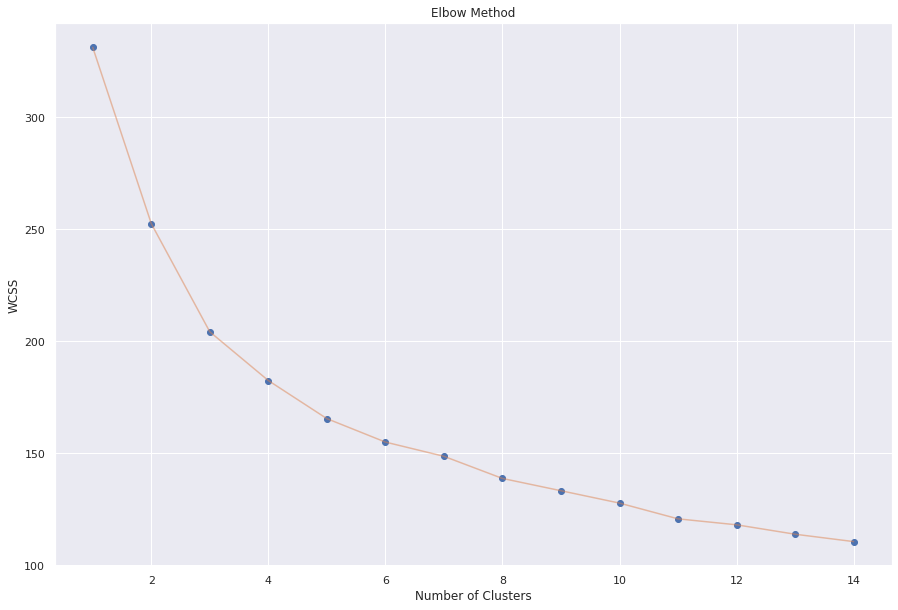

In [11]:
# Dados Padronizados
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)
  
# plotando o Elbow Method para encontrar o numero de clusters
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

Vamos trabalhar com 6 Clusters.

Agora vamos instanciar o modelo que vamos usar, definindo o número correto de clusters, e vamos ver como nossos dados foram separados.

In [12]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

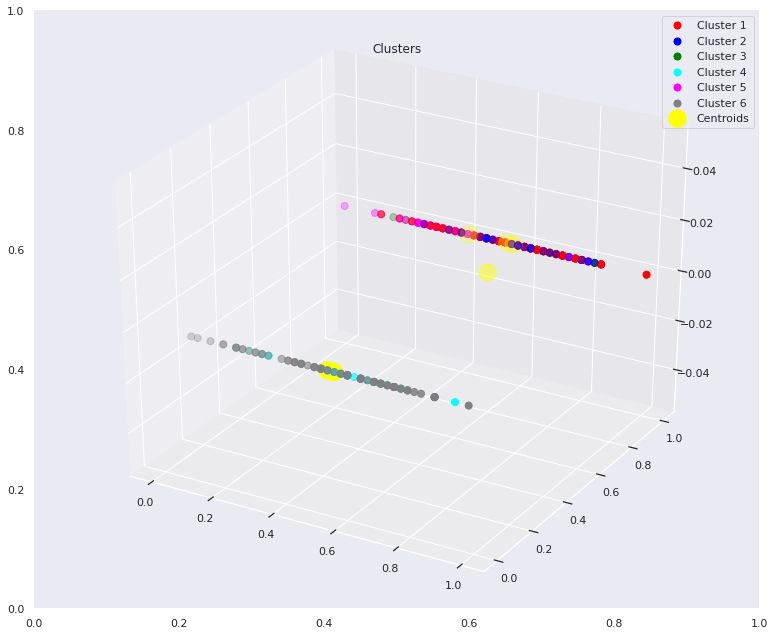

In [13]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

## Visualizando os Clusters

In [14]:
# visualizando as previsões
y_kmeans

array([1, 2, 5, 4, 3, 4, 5, 4, 1, 4, 4, 5, 4, 0, 1, 5, 5, 5, 4, 5, 2, 0,
       4, 1, 0, 5, 1, 4, 1, 1, 5, 4, 4, 2, 0, 3, 1, 4, 5, 5, 5, 2, 0, 5,
       4, 4, 4, 4, 5, 5, 5, 2, 2, 5, 5, 4, 4, 4, 4, 5, 1, 4, 2, 4, 1, 5,
       0, 5, 4, 5, 2, 0, 4, 0, 5, 5, 1, 0, 1, 0, 4, 4, 5, 1, 5, 5, 4, 1,
       5, 5, 1, 0, 4, 3, 5, 0, 5, 1, 4, 1, 4, 2, 5, 1, 4, 5, 1, 3, 5, 5,
       3, 1, 5, 4, 4, 5, 2, 2, 5, 3, 5, 4, 3, 5, 5, 5, 4, 5, 5, 3, 5, 5,
       4, 4, 5, 5, 1, 1, 0, 0, 5, 4, 5, 5, 5, 4, 5, 5, 4, 4, 4, 5, 2, 5,
       5, 5, 4, 4, 2, 4, 2, 5, 4, 4, 4, 0, 0, 5, 2, 0, 1, 2, 2, 2, 0, 0,
       0, 4, 0, 0, 0, 5, 5, 2, 2, 4, 0, 0, 2, 4, 3, 0, 2, 0, 2, 0, 2, 1,
       0, 4, 4, 0, 0, 1, 5, 0, 0, 5, 2, 0, 2, 0, 2, 3, 0, 3, 5, 0, 2, 0,
       5, 0, 1, 3, 0, 0, 2, 0, 2, 0, 4, 1, 0, 0, 2, 0, 4, 2, 0, 0, 0, 3,
       2, 0, 0, 2, 3, 0, 4, 2, 0, 0, 1, 0, 4, 0, 0, 0, 3, 0, 3, 4, 0, 3,
       0, 0, 3, 4, 0, 0, 4, 2, 2, 4, 0, 4, 2, 4, 1, 0, 0, 1, 1, 4, 0, 0,
       4, 4, 0, 3, 4, 2, 3, 2, 0, 0, 3, 1, 3, 2, 1,

In [15]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(303, 1)


,cluster
0,1
1,2
2,5
3,4
4,3


In [16]:
# concatenando os clusters 
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(303, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3


In [17]:
# conferindo a quantidade de ocorrencias por cluster
df['cluster'].value_counts()

0    73
5    67
4    67
2    41
1    33
3    22
Name: cluster, dtype: int64

In [18]:
# checando os registros por cluster
df.loc[df['cluster'] == 4][:20]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,4
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,4
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,4
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,4
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,4
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1,4
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,4
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1,4
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,4


## Para o cluster 4 o percentual de possibilidade de infarto é de 71.64 %

In [19]:
print('Percentual de infarto no Cluster 4 : {:.2f} % '.format(df.query('cluster ==4 & target == 1').count()[0] / df.query('cluster ==4').count()[0] * 100))
print('Percentual de náo infarto no Cluster 4 : {:.2f} % '.format(df.query('cluster ==4 & target == 0').count()[0] / df.query('cluster ==4').count()[0] * 100))

Percentual de infarto no Cluster 4 : 71.64 % 
Percentual de náo infarto no Cluster 4 : 28.36 % 


## Para os demais Clusters o percentual de infarto segue abaixo

In [20]:
print('Percentual de infarto no Cluster 0 : {:.2f} % '.format(df.query('cluster == 0 & target == 1').count()[0] / df.query('cluster == 0').count()[0] * 100))
print('Percentual de náo infarto no Cluster 0 :  {:.2f} % '.format(df.query('cluster == 0  & target == 0').count()[0] / df.query('cluster == 0').count()[0] * 100))

Percentual de infarto no Cluster 0 : 19.18 % 
Percentual de náo infarto no Cluster 0 :  80.82 % 


In [21]:
print('Percentual de infarto no Cluster 1 : {:.2f} % '.format( df.query('cluster == 1 & target == 1').count()[0] / df.query('cluster == 1').count()[0] * 100))
print('Percentual de náo infarto no Cluster 1 : {:.2f} % '.format(df.query('cluster == 1  & target == 0').count()[0] / df.query('cluster == 1').count()[0] * 100))


Percentual de infarto no Cluster 1 : 66.67 % 
Percentual de náo infarto no Cluster 1 : 33.33 % 


In [22]:
print('Percentual de infarto no Cluster 2 : {:.2f} % '.format(df.query('cluster == 2 & target == 1').count()[0] / df.query('cluster == 2').count()[0] * 100))
print('Percentual de náo infarto no Cluster 2 : {:.2f} % '.format(df.query('cluster == 2  & target == 0').count()[0] / df.query('cluster == 2').count()[0] * 100))

Percentual de infarto no Cluster 2 : 34.15 % 
Percentual de náo infarto no Cluster 2 : 65.85 % 


In [23]:
print('Percentual de infarto no Cluster 3 : {:.2f} % '.format(df.query('cluster == 3 & target == 1').count()[0] / df.query('cluster == 3').count()[0] * 100))
print('Percentual de náo infarto no Cluster 3 : {:.2f} % '.format(df.query('cluster == 3  & target == 0').count()[0] / df.query('cluster == 3').count()[0] * 100))

Percentual de infarto no Cluster 3 : 36.36 % 
Percentual de náo infarto no Cluster 3 : 63.64 % 


In [24]:
print('Percentual de infarto no Cluster 5 : {:.2f} % '.format(df.query('cluster == 5 & target == 1').count()[0] / df.query('cluster == 5').count()[0] * 100))
print('Percentual de náo infarto no Cluster 5 : {:.2f} % '.format(df.query('cluster == 5  & target == 0').count()[0] / df.query('cluster == 5').count()[0] * 100))

Percentual de infarto no Cluster 5 : 88.06 % 
Percentual de náo infarto no Cluster 5 : 11.94 % 
